In [ ]:
# MNIST
# Fashion MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

## I. Tải dữ liệu

In [ ]:
(trainX, trainY), (testX, testY) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## II. Hiển thị một ảnh

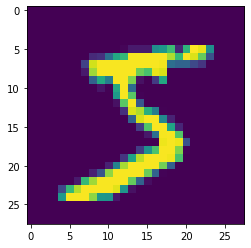

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(trainX[0])

In [ ]:
trainX.shape

(60000, 28, 28)

In [ ]:
# 1. Tạo mạng Sequential
# 2. Thêm một lớp Flatten() # 28 x 28 thành vector có chiều 784 x 1
# 3. Thêm một lớp Dense (256), activation='relu' 
# 4. Thêm một lớp Dense (128), activation='relu' 
# 5. Thêm một lớp Dense(10, activation='softmax')

## III. Chuẩn hóa dữ liệu

In [ ]:
trainX = trainX / 255.0

In [ ]:
testX = testX / 255.0

## IV. Xây dựng cấu trúc mạng

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## V. Test mô hình

In [ ]:
import tensorflow as tf

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
trainY[0]

5

In [ ]:
model.fit(trainX, trainY, epochs=10, verbose=1, validation_data=(testX, testY))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0959 - acc: 0.9732 - val_loss: 0.1041 - val_acc: 0.9690
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0890 - acc: 0.9749 - val_loss: 0.1008 - val_acc: 0.9692
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0828 - acc: 0.9768 - val_loss: 0.0981 - val_acc: 0.9713
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0768 - acc: 0.9786 - val_loss: 0.0934 - val_acc: 0.9716
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0718 - acc: 0.9797 - val_loss: 0.0897 - val_acc: 0.9726
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0673 - acc: 0.9814 - val_loss: 0.0871 - val_acc: 0.9739
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0629 - acc: 0.9826 - val_loss: 0.0834 - val_acc: 0.9743
Epoch 8/10
1875/1875 [==============================] - 5s 3ms

In [ ]:
model.save('ngoc.h5')

In [ ]:
# Testing

In [ ]:
test_image = testX[1:2, :, :]

In [ ]:
test_image.shape

(1, 28, 28)

In [ ]:
y = model.predict(test_image)

In [ ]:
y

array([[2.2774966e-06, 1.2151602e-03, 9.9773645e-01, 9.9467719e-04,
        1.2432093e-09, 3.0069123e-06, 6.7117694e-06, 1.2605485e-10,
        4.1657895e-05, 3.5946052e-11]], dtype=float32)

In [ ]:
import numpy as np
np.argmax(y)

2

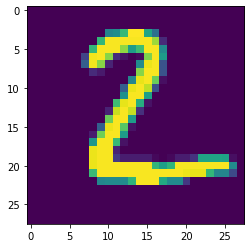

In [ ]:
plt.imshow(test_image[0, :, :])

## VI. Mô hình với hiệu chỉnh

In [ ]:
from tensorflow.keras.regularizers import L2

In [ ]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(256, activation="relu", kernel_regularizer='l2'))
model2.add(Dense(712, activation="relu", kernel_regularizer='l2'))
model2.add(Dense(64, activation='relu', kernel_regularizer='l1'))
model2.add(Dense(256, activation='relu', kernel_regularizer='l1'))
model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
model2.fit(trainX, trainY, epochs=10, verbose=1, validation_data=(testX, testY))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5756 - acc: 0.9115 - val_loss: 0.5562 - val_acc: 0.9129
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5642 - acc: 0.9128 - val_loss: 0.5438 - val_acc: 0.9168
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5546 - acc: 0.9138 - val_loss: 0.5440 - val_acc: 0.9161
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5452 - acc: 0.9141 - val_loss: 0.5291 - val_acc: 0.9174
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5365 - acc: 0.9161 - val_loss: 0.5246 - val_acc: 0.9205
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5283 - acc: 0.9161 - val_loss: 0.5101 - val_acc: 0.9192
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5212 - acc: 0.9183 - val_loss: 0.5043 - val_acc: 0.9216
Epoch 8/10
1875/1875 [==============================] - 5s 3ms